In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Чем выше класс, тем больше шанс выжить.

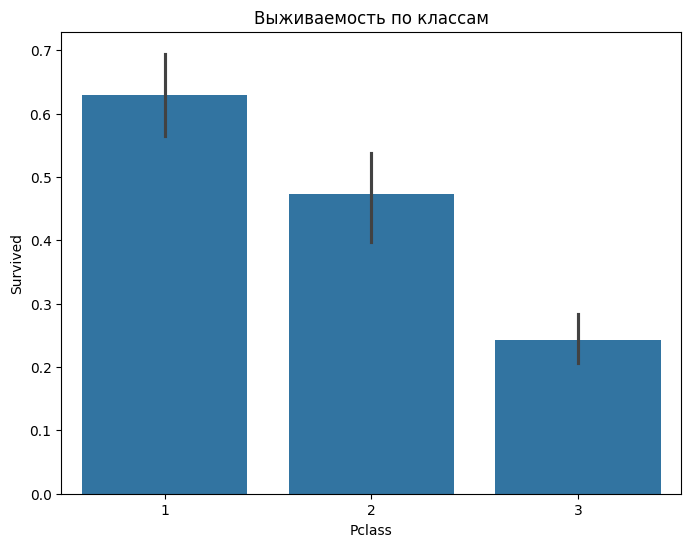

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Выживаемость по классам')
plt.show()

У женщин сильно больше шансов на выживание.

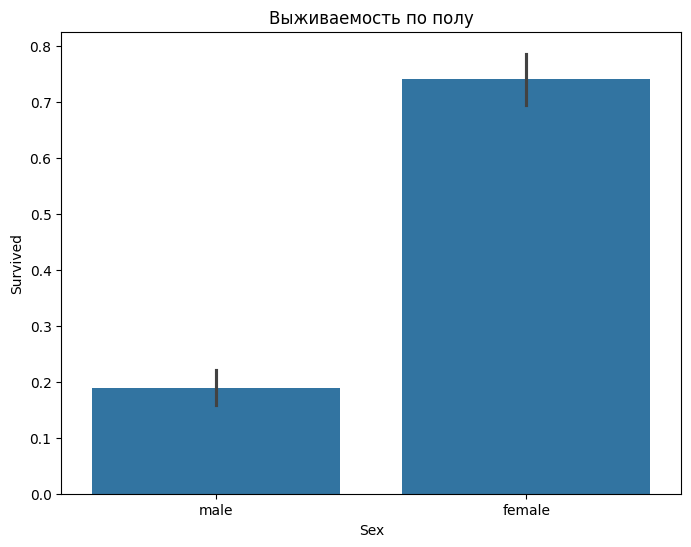

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Выживаемость по полу')
plt.show()

Нужно для дальнейшего распределения.


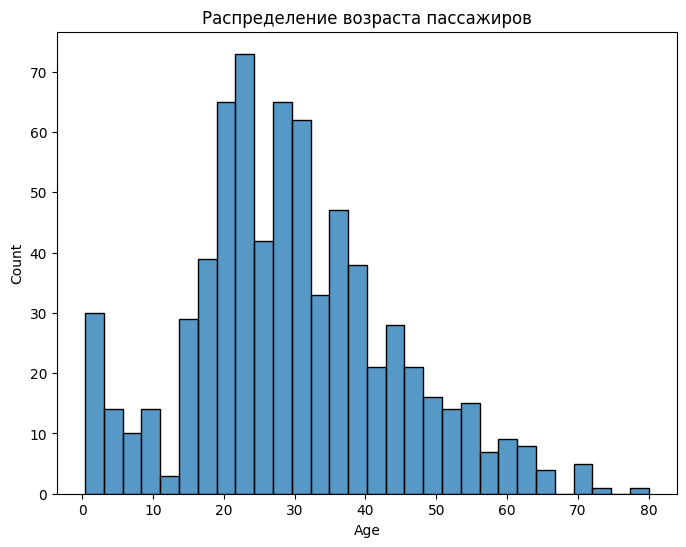

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Распределение возраста пассажиров')
plt.show()

Чаще выживали люди малого возраста.

<ipython-input-9-57adbdeca370>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Выжили')
<ipython-input-9-57adbdeca370>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Не выжили')


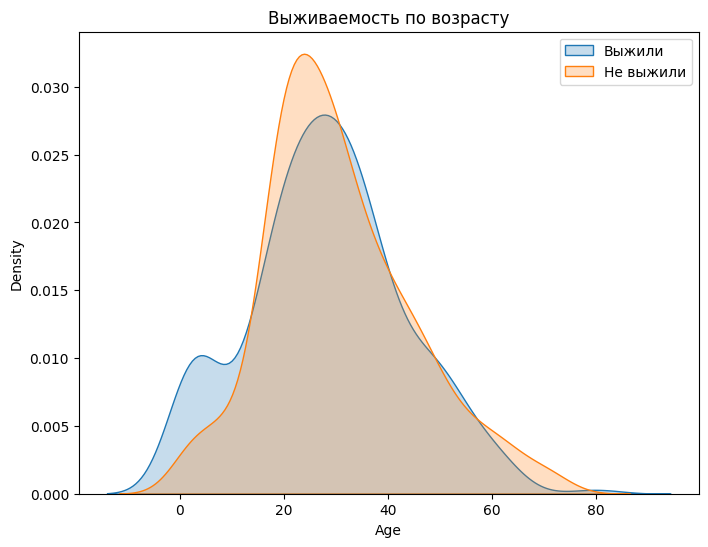

In [9]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Выжили')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Не выжили')
plt.title('Выживаемость по возрасту')
plt.legend()
plt.show()

Оптимальное количество людей в семье для выживания - 2-3.

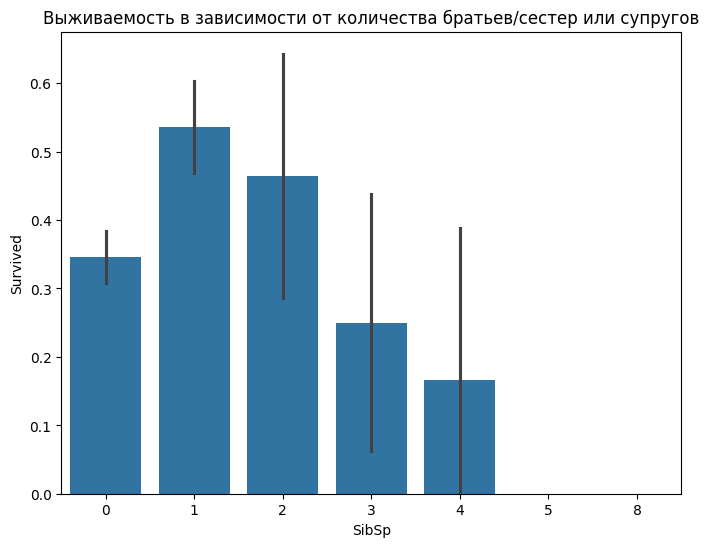

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Выживаемость в зависимости от количества братьев/сестер или супругов')
plt.show()

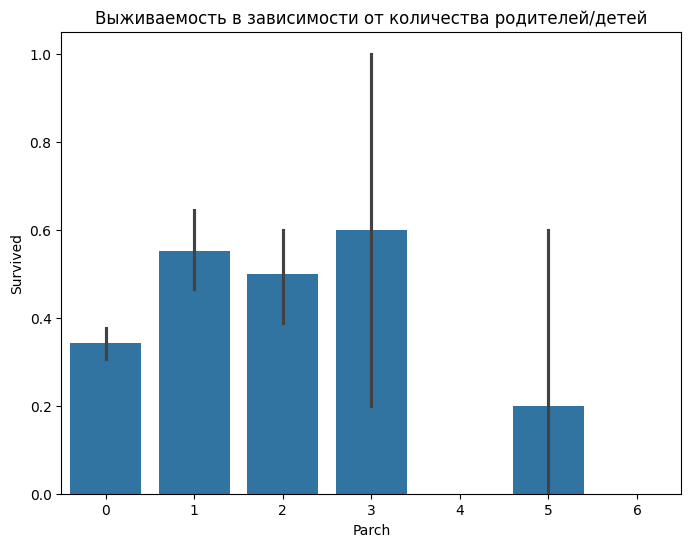

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Выживаемость в зависимости от количества родителей/детей')
plt.show()


Чем дороже билет, тем выше класс, тем больше успех.

<ipython-input-12-8b0fe0a035d0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Fare'], shade=True, label='Выжили')
<ipython-input-12-8b0fe0a035d0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Fare'], shade=True, label='Не выжили')


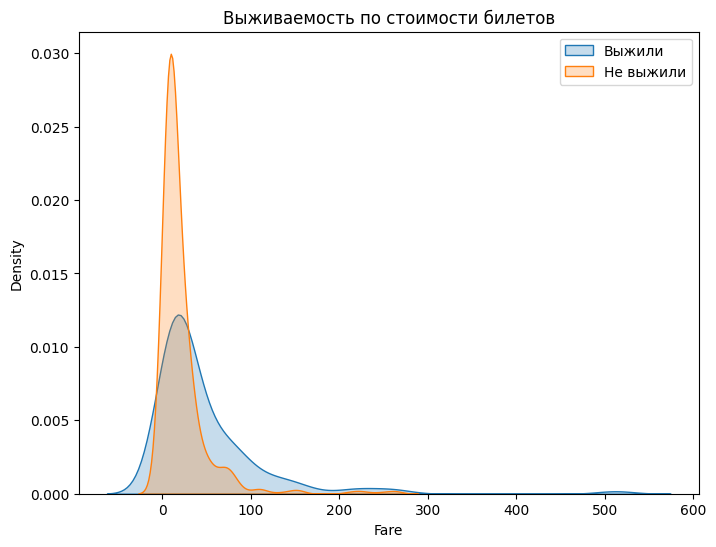

In [12]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], shade=True, label='Выжили')
sns.kdeplot(df[df['Survived'] == 0]['Fare'], shade=True, label='Не выжили')
plt.title('Выживаемость по стоимости билетов')
plt.legend()
plt.show()

Порт С - наилучший для посадки.

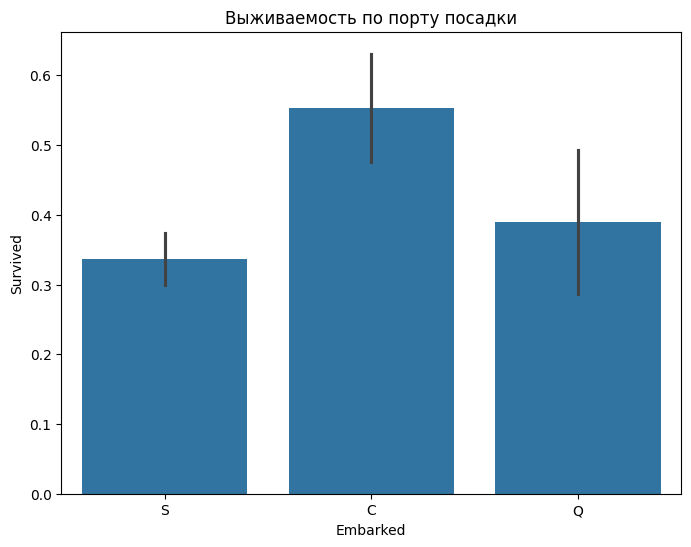

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Выживаемость по порту посадки')
plt.show()

Дальше - по вышеизложенному добавляем новые фичи.

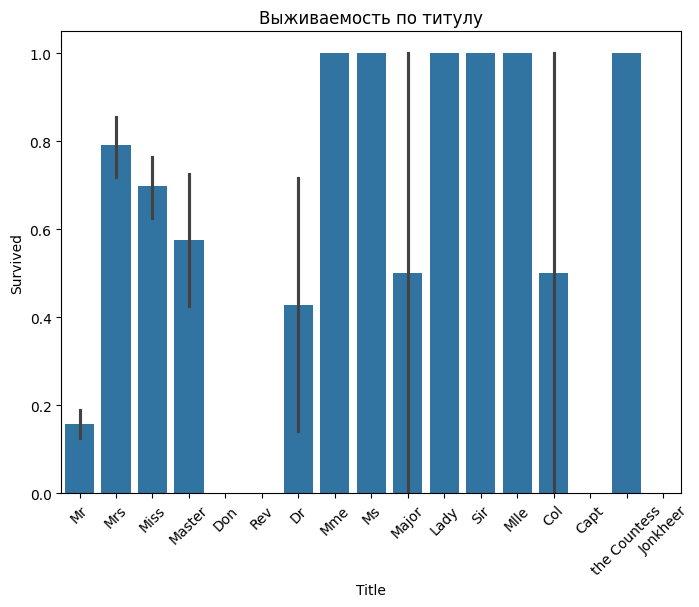

In [14]:
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
plt.figure(figsize=(8, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Выживаемость по титулу')
plt.xticks(rotation=45)
plt.show()

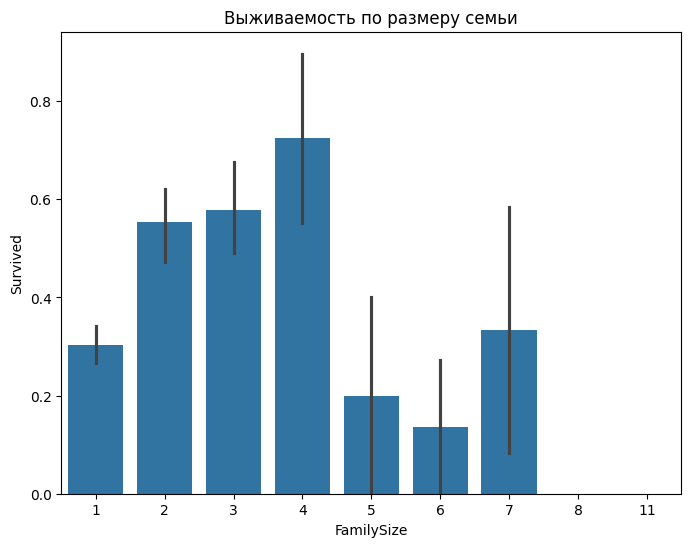

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Выживаемость по размеру семьи')
plt.show()

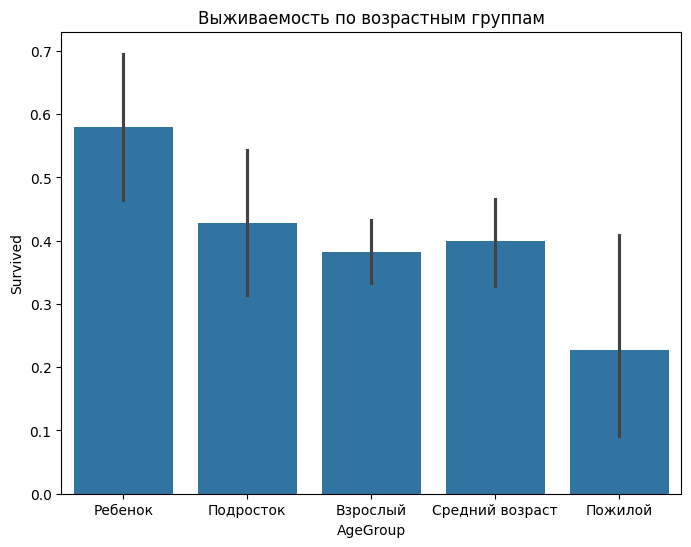

In [16]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Ребенок', 'Подросток', 'Взрослый', 'Средний возраст', 'Пожилой'])
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Выживаемость по возрастным группам')
plt.show()

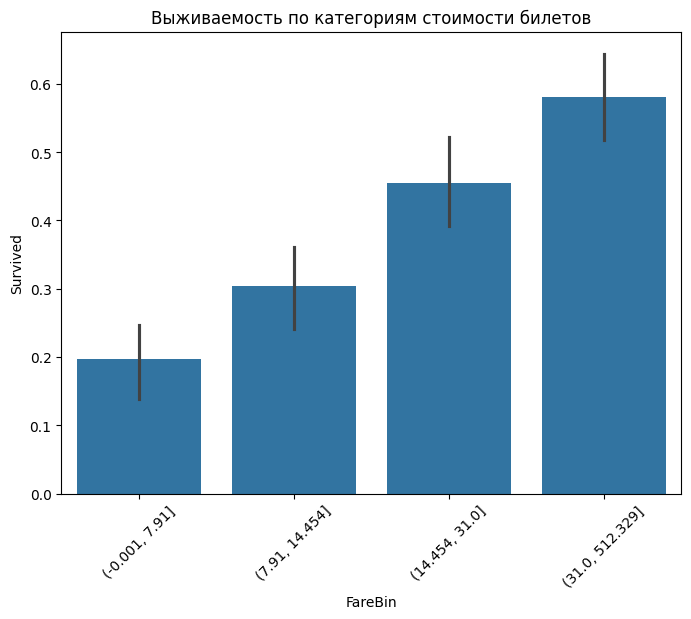

In [17]:
df['FareBin'] = pd.qcut(df['Fare'], 4)
plt.figure(figsize=(8, 6))
sns.barplot(x='FareBin', y='Survived', data=df)
plt.title('Выживаемость по категориям стоимости билетов')
plt.xticks(rotation=45)
plt.show()

In [18]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

# Замена пропущенных значений в категориальных столбцах модой
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
catregorical_cols= df.select_dtypes(include=['object']).columns
label_encoders ={}

In [22]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
df['Title'] = label.fit_transform(df['Title'])
df['AgeGroup'] = label.fit_transform(df['AgeGroup'])
df['FareBin'] = label.fit_transform(df['FareBin'])

In [23]:
catregorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  FamilySize   891 non-null    int64  
 14  AgeGroup     891 non-null    int64  
 15  FareBin      891 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 111.5+ KB


Выбираем только важные для обучения колонки.

In [24]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'AgeGroup', 'FareBin']
X = df[features]
y = df['Survived']

In [25]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Регуляризатор - экспериментальные значения.

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.008), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4252 - loss: 1.0913 - val_accuracy: 0.7692 - val_loss: 1.0085
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8073 - loss: 0.9843 - val_accuracy: 0.8112 - val_loss: 0.9136
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.9072 - val_accuracy: 0.8182 - val_loss: 0.8152
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.8156 - val_accuracy: 0.8182 - val_loss: 0.7293
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7919 - loss: 0.7408 - val_accuracy: 0.8392 - val_loss: 0.6735
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.7209 - val_accuracy: 0.8462 - val_loss: 0.6406
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8247 - loss: 0.6560 - val_accuracy: 0.8462 - val_loss: 0.6176
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8145 - loss: 0.6651 - val_accuracy: 0.8392 - val_loss: 0.6046
Ep

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5112 - loss: 1.0471 - val_accuracy: 0.7552 - val_loss: 0.9588
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 0.9143 - val_accuracy: 0.8182 - val_loss: 0.8461
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8289 - loss: 0.8197 - val_accuracy: 0.8392 - val_loss: 0.7537
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8015 - loss: 0.7726 - val_accuracy: 0.8392 - val_loss: 0.6968
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8097 - loss: 0.7178 - val_accuracy: 0.8322 - val_loss: 0.6717
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.6861 - val_accuracy: 0.8322 - val_loss: 0.6466
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8284 - loss: 0.6681 - val_accuracy: 0.8392 - val_loss: 0.6347
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.6193 - val_accuracy: 0.8322 - val_loss:

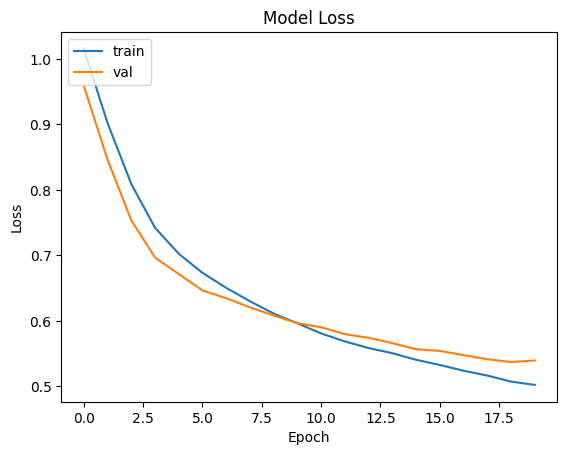

In [30]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

kf = KFold(n_splits=3, shuffle=True, random_state=43)

fold_metrics = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    X_test = scaler.transform(X_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Fold {fold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fold_metrics.append((classification_report(y_test, y_pred, output_dict=True), confusion_matrix(y_test, y_pred)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 1
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       184
           1       0.76      0.65      0.70       113

    accuracy                           0.79       297
   macro avg       0.78      0.76      0.77       297
weighted avg       0.79      0.79      0.79       297

Confusion Matrix:
 [[161  23]
 [ 39  74]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       184
           1       0.77      0.79      0.78       113

    accuracy                           0.83       297
   macro avg       0.82      0.82      0.82       297
weighted avg       0.83      0.83      0.83       297

Confusion Matrix:
 [[158  26]
 [ 24  89]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3
Classification Report:
               precision    recall  f1-score   supp

Интерпретация матриц ошибок для каждого фолда

Fold 1:

True Positives (TP): Модель предсказала, что человек выживет, и он действительно выжил – 74.
True Negatives (TN): Модель предсказала, что человек погибнет, и он действительно погиб – 161.
False Positives (FP): Модель предсказала, что человек выживет, а по факту погиб – 23.
False Negatives (FN): Модель предсказала, что человек погибнет, а по факту выжил – 39.

Fold 2:

TP: 89
TN: 158
FP: 26
FN: 24

Fold 3:

TP: 90
TN: 164
FP: 17
FN: 26

Окончательный вывод
Итоговая модель показала стабильные метрики по всем фолдам. Средняя точность составила около 83–86% в зависимости от фолда, что указывает на хорошую способность модели различать классы. Ключевые ошибки — это ложные отрицания (FN), что может быть критичным, так как модель иногда не определяет выживших, предсказывая их гибель. Уровень ложных срабатываний (FP) также приемлемо низок, что свидетельствует о надежности модели в предсказании тех, кто на самом деле погиб.